In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso,  ElasticNet
from sklearn import ensemble
from sklearn import svm
from xgboost import XGBRegressor


from sklearn.model_selection import RandomizedSearchCV

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#import xgboost as xgb

In [2]:
#scoring_metric= 'neg_mean_squared_error'
scoring_metric= 'r2'
#scoring_metric = 'neg_mean_absolute_error'

# Teraz wczytać opracowane dane i zaczać prace z różnymi modelami. Uzyć pipeline krosswalidacje etc do wyboru najlepszego modelu, następnie ten wybrany model przenieść do nowego jupyter notebooka i tam stroić hiperparametry

In [3]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [4]:
#Wczytanie danych
df = pd.read_csv(URL, sep=",", encoding="utf-8")

In [5]:
df

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
0,3 pokoje z zielonym tarasem i balkonem + MP,759000.0,"Maślice, Fabryczna, Wrocław, dolnośląskie",61.83,12276,3,https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...,pełna własność,do zamieszkania,parter,...,0,0,0,0,1,1,1,0,0,1
1,Maślicka 166 C | mieszkanie K2_2,616161.0,"ul. Maślicka 166, Maślice, Fabryczna, Wrocław,...",67.71,9100,3,https://www.otodom.pl/pl/oferta/maslicka-166-c...,pełna własność,do wykończenia,parter,...,0,0,0,1,0,0,0,0,0,0
2,Bezpieczna/dwustronne/rozkład/co miejskie/piwnica,576000.0,"Bezpieczna okolice, Różanka, Psie Pole, Wrocła...",57.70,9983,3,https://www.otodom.pl/pl/oferta/bezpieczna-dwu...,pełna własność,do zamieszkania,4,...,1,0,0,0,1,1,0,0,0,0
3,Piłsudskiego/ super/ m. miejskie/ balkon /piwnica,470000.0,"ul. marsz. Józefa Piłsudskiego, Przedmieście Ś...",40.00,11750,1,https://www.otodom.pl/pl/oferta/pilsudskiego-s...,Zapytaj,do zamieszkania,3,...,1,0,0,1,0,0,0,0,0,0
4,"Mieszkanie, 61 m², Wrocław",633000.0,"Tarnogaj, Krzyki, Wrocław, dolnośląskie",61.00,10377,3,https://www.otodom.pl/pl/oferta/mieszkanie-61-...,pełna własność,do wykończenia,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,"1,4 Km od Rynku Idealne dla Rodziny Stare Miasto",456000.0,"Nadodrze, Śródmieście, Wrocław, dolnośląskie",46.50,9806,3,https://www.otodom.pl/pl/oferta/1-4-km-od-rynk...,pełna własność,Zapytaj,1,...,0,0,0,1,0,0,0,0,0,0
6662,Ovo Apartamenty,699000.0,"ul. Podwale, Stare Miasto, Stare Miasto, Wrocł...",25.00,27960,1,https://www.otodom.pl/pl/oferta/ovo-apartament...,pełna własność,do zamieszkania,5,...,0,1,0,0,0,0,1,0,0,0
6663,"2-pokoje, komfortowa lokalizacja - Sienkiewicza.",834000.0,"ul. Henryka Sienkiewicza, Ołbin, Śródmieście, ...",65.97,12642,2,https://www.otodom.pl/pl/oferta/2-pokoje-komfo...,pełna własność,do zamieszkania,1,...,1,1,0,1,0,0,0,0,0,0
6664,ładne 2 pokojowe,489000.0,"ul. Jedności Narodowej, Ołbin, Śródmieście, Wr...",54.00,9056,2,https://www.otodom.pl/pl/oferta/ladne-2-pokojo...,pełna własność,do zamieszkania,4,...,0,0,0,1,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6666 non-null   object 
 1   prices                                      6666 non-null   float64
 2   location                                    6666 non-null   object 
 3   area                                        6666 non-null   float64
 4   price per square meter                      6666 non-null   int64  
 5   numbers_of_rooms                            6666 non-null   int64  
 6   urls                                        6666 non-null   object 
 7   property_ownership                          6666 non-null   object 
 8   condition_of_property                       6666 non-null   object 
 9   floor                                       6666 non-null   object 
 10  balcon_garde

In [7]:
y = df['prices']
#y = df['price per square meter']


In [8]:
columns_to_remove = ["titles", "prices", "price per square meter", "location", "location_remain", "province", "city", "urls", "balcon_garden_terrace", "utilities", "security", "describe"]
columns_to_remove

['titles',
 'prices',
 'price per square meter',
 'location',
 'location_remain',
 'province',
 'city',
 'urls',
 'balcon_garden_terrace',
 'utilities',
 'security',
 'describe']

In [9]:
X = df[[cname for cname in df.columns if cname not in columns_to_remove]]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area                                        6666 non-null   float64
 1   numbers_of_rooms                            6666 non-null   int64  
 2   property_ownership                          6666 non-null   object 
 3   condition_of_property                       6666 non-null   object 
 4   floor                                       6666 non-null   object 
 5   amount_of_rent                              2710 non-null   float64
 6   parking_space                               6666 non-null   object 
 7   type_of_heating                             6666 non-null   object 
 8   primary_secondary                           6666 non-null   object 
 9   seller                                      6666 non-null   object 
 10  year_of_cons

In [11]:
# Podział danych na zbiór treningowy i walidacyjny
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [12]:
# Wybór kolumna z niską ilością kategorii  
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]

#ategorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]
categorical_cols

['property_ownership',
 'condition_of_property',
 'floor',
 'parking_space',
 'type_of_heating',
 'primary_secondary',
 'seller',
 'year_of_construction',
 'type_of_development',
 'window',
 'lift',
 'home_furnishings',
 'additional_info',
 'bulding_material',
 'district']

In [13]:
if "district" not in categorical_cols:
    categorical_cols.append("disctrict")
    print("Dodano dzielnice do listy kolumn")

In [14]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int8', 'int32', 'int64', 'float64']]
numerical_cols

['area',
 'numbers_of_rooms',
 'amount_of_rent',
 'number_of_floors',
 'balcon_garden_terrace_dummy_Zapytaj',
 'balcon_garden_terrace_dummy_balkon',
 'balcon_garden_terrace_dummy_ogrodek',
 'balcon_garden_terrace_dummy_taras',
 'utilities_dummy_brak_informacji',
 'utilities_dummy_gaz',
 'utilities_dummy_internet',
 'utilities_dummy_kanalizacja',
 'utilities_dummy_prad',
 'utilities_dummy_telefon',
 'utilities_dummy_telewizja_kablowa',
 'utilities_dummy_woda',
 'security_dummy_brak_informacji',
 'security_dummy_domofon_/_wideofon',
 'security_dummy_drzwi_/_okna_antywlamaniowe',
 'security_dummy_monitoring_/_ochrona',
 'security_dummy_rolety_antywlamaniowe',
 'security_dummy_system_alarmowy',
 'security_dummy_teren_zamkniety']

In [15]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [16]:
X_train.sample(10)

,property_ownership,condition_of_property,floor,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
6019,pełna własność,do wykończenia,6,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
1235,pełna własność,Zapytaj,2,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,2010<x<2018,apartamentowiec,brak informacji,...,0,0,0,0,0,0,0,0,1,0
1798,pełna własność,Zapytaj,2,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,2018<=x,blok,brak informacji,...,1,1,0,0,1,1,1,0,0,0
338,Zapytaj,Zapytaj,2,garaż/miejsce parkingowe,Zapytaj,pierwotny,biuro nieruchomości,2018<=x,apartamentowiec,plastikowe,...,0,0,0,1,0,0,0,0,0,0
805,pełna własność,do wykończenia,2,garaż/miejsce parkingowe,kotłownia,pierwotny,biuro nieruchomości,2018<=x,blok,plastikowe,...,1,1,0,0,1,0,0,0,0,0
4607,pełna własność,do wykończenia,parter,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
3928,pełna własność,do zamieszkania,3,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,2010<x<2018,blok,brak informacji,...,0,0,0,1,0,0,0,0,0,0
4036,pełna własność,do wykończenia,parter,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,blok,plastikowe,...,0,0,0,0,1,0,0,0,0,0
97,pełna własność,do wykończenia,3,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
2668,Zapytaj,Zapytaj,4,Zapytaj,miejskie,pierwotny,biuro nieruchomości,2018<=x,brak informacji,plastikowe,...,0,0,0,0,1,0,0,0,0,0


## Preprocessing

In [17]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')),
    #('imputer_num', SimpleImputer(strategy = 'constant')),
    ('std_scaler', StandardScaler())
    #('normalizer', Normalizer())
    
    ])



## Na ten moment uzupełnianie wartości wykoanane jest poprzez najprostsze metody (zastanowić się czy nie zrobić czegoś lepszego na przykład wcześniej wykonać klasyfikacje dla kolumn kategorialnych a dla numerycznych też w jakiś lepszy sposób je uzupełnić)

In [18]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [20]:
model_1 = LinearRegression()
model_2 = Ridge()
model_3 = DecisionTreeRegressor()
model_4 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_5 = XGBRegressor()
#models = [model_1, model_2, model_3, model_4, model_5]
models = [model_1, model_2, model_3, model_5]

In [21]:
def plot_valid_pred(y_valid, y_pred, start_index, plot_width):
    start_index = start_index
    plot_width = plot_width
    x_axis = pd.Series(range(start_index, start_index + plot_width, 1))
    y_valid_plot  = y_valid.iloc[:plot_width]
    y_valid_plot = y_valid_plot.reset_index(drop=True)
    y_pred_plot  = y_pred.iloc[:plot_width]
    y_pred_plot = y_pred_plot.reset_index(drop=True)    
    data_preproc = pd.DataFrame({"x_axis": x_axis,
                             "original": y_valid_plot ,
                             "predicted": y_pred_plot})
    sns.lineplot(x="x_axis", y='value', hue='variable', data = pd.melt(data_preproc, ['x_axis']))
    plt.show()
    
    

In [22]:
def score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot: bool=False):
    pipeline.fit(X_train, y_train)
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_valid = pipeline.predict(X_valid)
    
    print("----------------------------", end="\n\n")
    print(model, end="\n\n")
    print('Zbiór treningowy:')
    print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
    print('MAPE: '+ str(mean_absolute_percentage_error(y_train, y_pred_train)))
    print('MSE: '+ str(mean_squared_error(y_train, y_pred_train)))
    print("Coefficient of determination r2: %.2f" % r2_score(y_train, y_pred_train))
    
    print('Zbiór walidacyjny:')
    print('MAE: '+ str(mean_absolute_error(y_valid, y_pred_valid)))
    print('MAPE: '+ str(mean_absolute_percentage_error(y_valid, y_pred_valid)))
    print('MSE: '+ str(mean_squared_error(y_valid, y_pred_valid)))
    print("Coefficient of determination r2: %.2f" % r2_score(y_valid, y_pred_valid), end="\n\n")
    
    validation_result = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = scoring_metric)
    print('Krosswalidacja:', end="\n\n")
    print('Wynik krosswalidacji: ')
    print(validation_result)
    print("Średnia: " + str(validation_result.mean()), end="\n\n")    
    

    if plot:
        y_pred_valid = pd.Series(y_pred_valid)
        plot_valid_pred(y_valid, y_pred_valid, 0, 100)
    
    print("----------------------------", end="\n\n")
    #return mean_absolute_error(y_v, preds)

----------------------------

LinearRegression()

Zbiór treningowy:
MAE: 64540.752616366495
MAPE: 0.10026990488728085
MSE: 7743624764.259811
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64223.007189504264
MAPE: 0.0988725281413225
MSE: 7370394779.557387
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76147266 0.73751065 0.69444476 0.70601621 0.70832922 0.72039655
 0.74018571 0.7572316  0.71175321 0.74032675]
Średnia: 0.7277667315445837



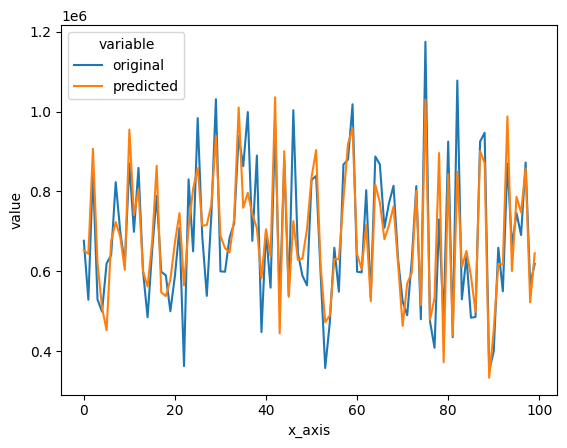

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64751.37453134224
MAPE: 0.10059960389601894
MSE: 7763817014.334328
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 63998.34688020396
MAPE: 0.09852906833452572
MSE: 7300422264.30806
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76223617 0.73957234 0.69527393 0.7081843  0.70935466 0.72185474
 0.7430223  0.75841704 0.71302418 0.7434891 ]
Średnia: 0.7294428761515257



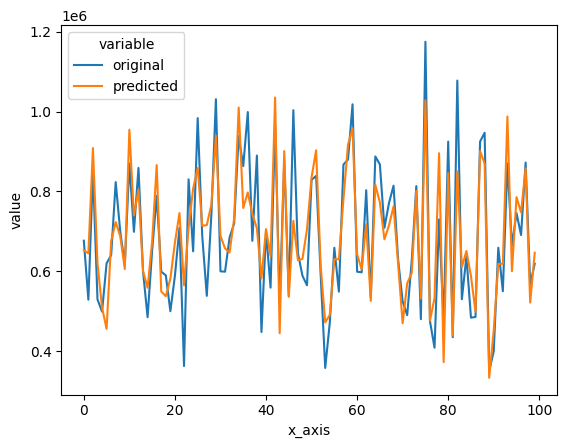

----------------------------

----------------------------

DecisionTreeRegressor()

Zbiór treningowy:
MAE: 155.44415436651371
MAPE: 0.00023478136579711844
MSE: 3146095.5231927093
Coefficient of determination r2: 1.00
Zbiór walidacyjny:
MAE: 63346.30245067402
MAPE: 0.09514662002827616
MSE: 10684658929.543413
Coefficient of determination r2: 0.64

Krosswalidacja:

Wynik krosswalidacji: 
[0.65947914 0.6288583  0.60541342 0.59581924 0.57072732 0.58311949
 0.66363373 0.64221373 0.5966975  0.63003284]
Średnia: 0.6175994705426299



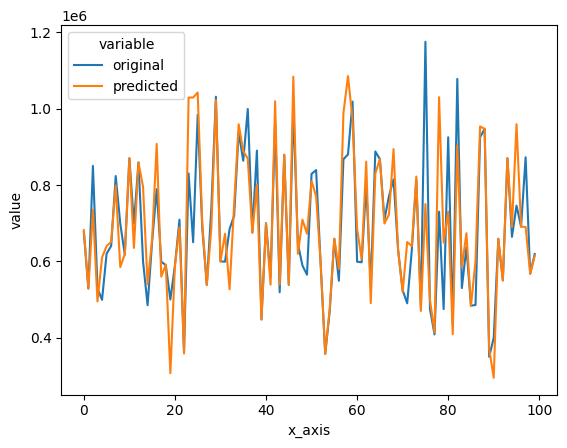

----------------------------

----------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Zbiór treningowy:
MAE: 26359.31274123218
MAPE: 0.040690382219354164
MSE: 1377580432.3052971
Coefficient of determination r2: 0.96
Zbiór walidacyjny:
MAE: 49207.15845858321
MAPE: 0.074579809112

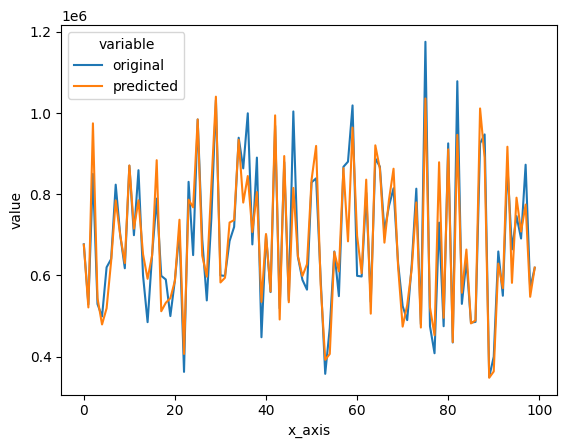

----------------------------



In [23]:
for model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [24]:
dla #categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]


----------------------------

LinearRegression()
Zbiór treningowy:
MAE: 67135.46069954989
Coefficient of determination r2: 0.73
Zbiór walidacyjny:
MAE: 95477731674587.53
Coefficient of determination r2: -150729680910868905984.00
----------------------------

----------------------------

Ridge()
Zbiór treningowy:
MAE: 67101.82673745905
Coefficient of determination r2: 0.73
Zbiór walidacyjny:
MAE: 64498.93560385134
Coefficient of determination r2: 0.74
----------------------------

----------------------------

DecisionTreeRegressor()
Zbiór treningowy:
MAE: 823.2741448755045
Coefficient of determination r2: 1.00
Zbiór walidacyjny:
MAE: 63856.102586109555
Coefficient of determination r2: 0.62
----------------------------

----------------------------

RandomForestRegressor(criterion='absolute_error', random_state=0)
Zbiór treningowy:
MAE: 19573.21512577832
Coefficient of determination r2: 0.97
Zbiór walidacyjny:
MAE: 47595.11695438531
Coefficient of determination r2: 0.82
----------------------------

----------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Zbiór treningowy:
MAE: 25274.937801481625
Coefficient of determination r2: 0.96
Zbiór walidacyjny:
MAE: 51061.00277736132
Coefficient of determination r2: 0.81
----------------------------


SyntaxError: invalid syntax (12515388.py, line 4)

In [ ]:
dla #categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]


----------------------------

LinearRegression()
Zbiór treningowy:
MAE: 64347.55843281623
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64384.54700054284
Coefficient of determination r2: 0.75
----------------------------

----------------------------

Ridge()
Zbiór treningowy:
MAE: 64573.83568884107
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64159.8505683088
Coefficient of determination r2: 0.75
----------------------------

----------------------------

DecisionTreeRegressor()
Zbiór treningowy:
MAE: 155.44415436651371
Coefficient of determination r2: 1.00
Zbiór walidacyjny:
MAE: 64368.18992664383
Coefficient of determination r2: 0.64
----------------------------

----------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Zbiór treningowy:
MAE: 26383.31237457802
Coefficient of determination r2: 0.96
Zbiór walidacyjny:
MAE: 50459.418214018
Coefficient of determination r2: 0.81
----------------------------

# Teraz dla każdego z 5 różnych modeli wziąć go na warsztat i wykorzystając krosswalidacje i grid search znaleźć najlepsze hiperparametry!

# 1. LinearRegression()

# Dla regresji liniowej fajnie byłoby spróbowac wylosować ze 100 pukntów powierzchnia i cena i  zrobić samemu regresje liniową,  z wizualizacją funkcji kosztu etc.

In [25]:
model = LinearRegression()

In [26]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('standarization', )
                              ('model', model)])

----------------------------

LinearRegression()

Zbiór treningowy:
MAE: 64540.752616366495
MAPE: 0.10026990488728085
MSE: 7743624764.259811
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64581.01051247589
MAPE: 0.09928449974428177
MSE: 7569780021.903905
Coefficient of determination r2: 0.74

Krosswalidacja:

Wynik krosswalidacji: 
[-65687.86875895 -67715.15988558 -67038.71516567 -72786.29229288
 -67004.33062987 -66950.35108131 -66005.62667064 -65812.94213581
 -68291.69058569 -64106.76432488]
Średnia: -67139.97415312899



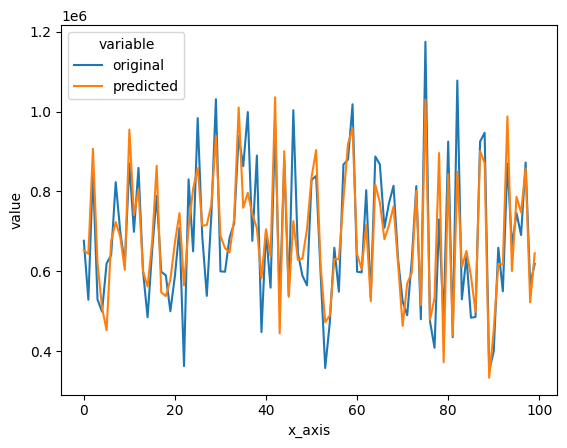

----------------------------



In [28]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [26]:
parameters_grid = {'model__fit_intercept':[True, False]}


In [27]:
grid_cv_model = GridSearchCV(pipeline, parameters_grid, cv=5, scoring= scoring_metric).fit(X_train, y_train)


In [28]:
grid_cv_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                                                                          'balcon_garden_terrace_dummy_Zapytaj',
                                                                          'balcon_garden_terrace_dummy_balkon',
                                                                          'balcon_garden_terrace_dummy_og...
                                                                         ['property_ownership',
                                                                          'condition_of_property',
                                                                          'floor',
                                                                          'parking_space',
                                                                          'type_of_heating',
                                                                          'primary_secondary',
                                                                          'seller',
                                                                          'year_of_construction',
                                                                          'type_of_development',
                                                                          'window',
                                                                          'lift',
                                                                          'home_furnishings',
                                                                          'additional_info',
                                                                          'bulding_material',
                                                                          'district'])])),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [29]:
print(grid_cv_model.best_score_)

-3362147.4040455623


In [30]:
print(grid_cv_model.best_params_)

{'model__fit_intercept': True}


In [31]:
best_param_dict = grid_cv_model.best_params_
best_param_dict

{'model__fit_intercept': True}

In [32]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric)

----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                         

# 2. Ridge()

In [33]:
model = Ridge()

In [34]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

Ridge()

Zbiór treningowy:
MAE: 1283.1846164951585
MAPE: 0.10444973314426352
MSE: 3122349.2579104467
Coefficient of determination r2: 0.60
Zbiór walidacyjny:
MAE: 1277.534688412283
MAPE: 0.10460263268632275
MSE: 3029039.8928246233
Coefficient of determination r2: 0.58

Krosswalidacja:

Wynik krosswalidacji: 
[-2868783.19413365 -3123762.47735867 -3706755.82118688 -3699349.65764407
 -3548749.59252289 -3314865.26323338 -3014712.52121377 -3591619.36580346
 -3110875.66511158 -3193639.96906973]
Średnia: -3317311.3527278076



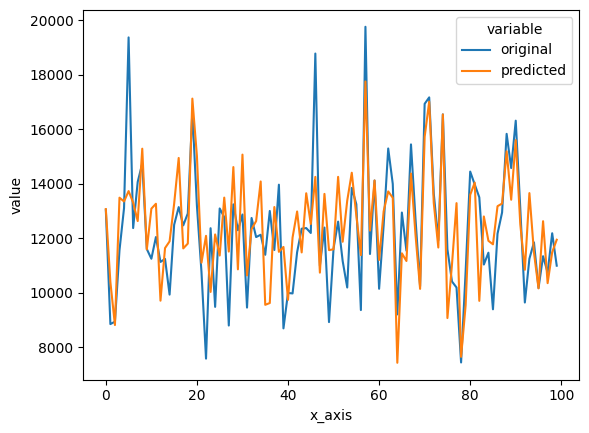

----------------------------



In [35]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot= True)

In [36]:
parameters_grid = {'model__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

In [37]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
grid_cv_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                                                                          'balcon_garden_terrace_dummy_Zapytaj',
                                                                          'balcon_garden_terrace_dummy_balkon',
                                                                          'balcon_garden_terrace_dummy_og...
                                                                          'type_of_development',
                                                                          'window',
                                                                          'lift',
                                                                          'home_furnishings',
                                                                          'additional_info',
                                                                          'bulding_material',
                                                                          'district'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                          0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                          5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                          100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
print(grid_cv_model.best_score_)

-1322.150336967891


In [40]:
print(grid_cv_model.best_params_)

{'model__alpha': 50}


In [41]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)

----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                         

In [42]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080770,0.007873,0.008572,0.000795,0.000001,{'model__alpha': 1e-06},-1312.924185,-1376.641242,-1321.531562,-1324.345264,...,-1331.281356,22.996129,26,-1281.345249,-1264.512326,-1270.698852,-1276.295382,-1276.705284,-1273.911419,5.786438
1,0.070058,0.004809,0.007588,0.000808,0.00001,{'model__alpha': 1e-05},-1312.916879,-1376.618519,-1321.527737,-1324.386420,...,-1331.284697,22.985337,27,-1281.350763,-1264.514518,-1270.698408,-1276.345853,-1276.706685,-1273.923245,5.791517
2,0.070166,0.004169,0.009175,0.001155,0.0001,{'model__alpha': 0.0001},-1312.886096,-1376.646968,-1321.533651,-1324.346320,...,-1331.274217,23.004814,25,-1281.350982,-1264.517002,-1270.708644,-1276.293346,-1276.706509,-1273.915297,5.785257
3,0.071820,0.004839,0.007895,0.000683,0.001,{'model__alpha': 0.001},-1312.876574,-1376.651982,-1321.536071,-1324.345746,...,-1331.310554,22.991725,28,-1281.328928,-1264.518084,-1270.706164,-1276.292670,-1276.716657,-1273.912501,5.780442
4,0.078201,0.008384,0.009272,0.002353,0.01,{'model__alpha': 0.01},-1312.842558,-1376.510989,-1321.525976,-1324.255598,...,-1331.203994,22.970830,24,-1281.358556,-1264.581820,-1270.751667,-1276.316166,-1276.754881,-1273.952618,5.767927


In [43]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080770,0.007873,0.008572,0.000795,0.000001,{'model__alpha': 1e-06},-1312.924185,-1376.641242,-1321.531562,-1324.345264,...,-1331.281356,22.996129,26,-1281.345249,-1264.512326,-1270.698852,-1276.295382,-1276.705284,-1273.911419,5.786438
1,0.070058,0.004809,0.007588,0.000808,0.00001,{'model__alpha': 1e-05},-1312.916879,-1376.618519,-1321.527737,-1324.386420,...,-1331.284697,22.985337,27,-1281.350763,-1264.514518,-1270.698408,-1276.345853,-1276.706685,-1273.923245,5.791517
2,0.070166,0.004169,0.009175,0.001155,0.0001,{'model__alpha': 0.0001},-1312.886096,-1376.646968,-1321.533651,-1324.346320,...,-1331.274217,23.004814,25,-1281.350982,-1264.517002,-1270.708644,-1276.293346,-1276.706509,-1273.915297,5.785257
3,0.071820,0.004839,0.007895,0.000683,0.001,{'model__alpha': 0.001},-1312.876574,-1376.651982,-1321.536071,-1324.345746,...,-1331.310554,22.991725,28,-1281.328928,-1264.518084,-1270.706164,-1276.292670,-1276.716657,-1273.912501,5.780442
4,0.078201,0.008384,0.009272,0.002353,0.01,{'model__alpha': 0.01},-1312.842558,-1376.510989,-1321.525976,-1324.255598,...,-1331.203994,22.970830,24,-1281.358556,-1264.581820,-1270.751667,-1276.316166,-1276.754881,-1273.952618,5.767927


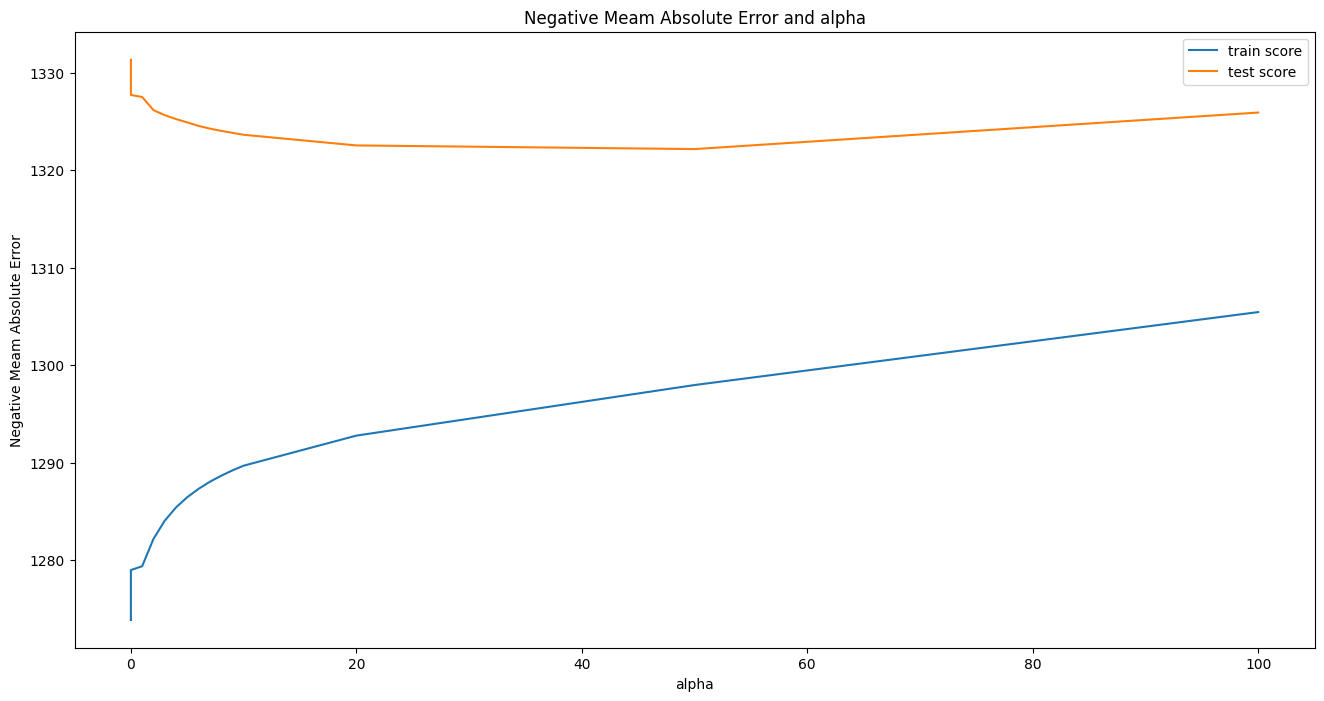

,mean_train_score,mean_test_score
0,1273.911419,1331.281356
1,1273.923245,1331.284697
2,1273.915297,1331.274217
3,1273.912501,1331.310554
4,1273.952618,1331.203994
5,1274.262853,1330.935313
6,1274.656652,1330.653149
7,1275.368517,1330.089216
8,1276.005592,1329.624441
9,1276.613282,1329.232432


In [44]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

cv_results = cv_results[cv_results['param_model__alpha']<=200]
cv_results['mean_test_score'] = cv_results['mean_test_score'].apply(lambda x: -x)
cv_results['mean_train_score'] = cv_results['mean_train_score'].apply(lambda x: -x)

cv_results[['mean_train_score', 'mean_test_score']]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()
cv_results[['mean_train_score', 'mean_test_score']]

# 3.Lasso()

In [45]:
model = Lasso()

In [46]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])


----------------------------

Lasso()

Zbiór treningowy:
MAE: 1289.3454902666947
MAPE: 0.1049113857767225
MSE: 3154562.0972420317
Coefficient of determination r2: 0.60
Zbiór walidacyjny:
MAE: 1278.1194934435298
MAPE: 0.10441134666486596
MSE: 3051179.830579409
Coefficient of determination r2: 0.58

Krosswalidacja:

Wynik krosswalidacji: 
[-2823762.590693   -3095532.53674985 -3696837.18426991 -3680280.77566811
 -3554641.90222736 -3282882.98122911 -2958678.72900126 -3589738.32613671
 -3069826.37524444 -3147475.9621823 ]
Średnia: -3289965.736340205



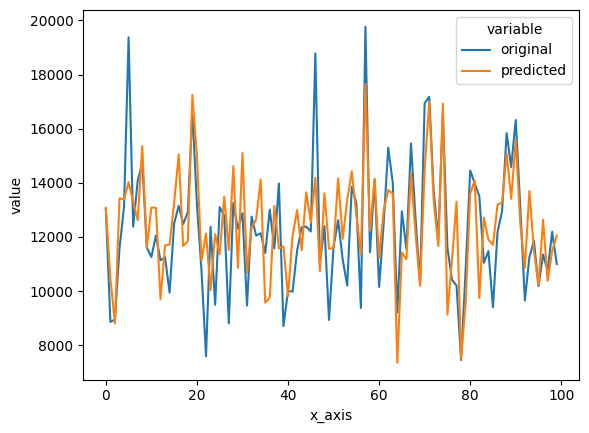

----------------------------



In [47]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot= True)

In [48]:
parameters_grid = {'model__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

In [49]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)
grid_cv_model

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4982251297.846285, tolerance: 3399157.77809857
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4200027266.056967, tolerance: 3332702.699376554
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2588730818.657091, tolerance: 3314586.420194843
  model = cd_fast.sparse_enet_coordinate_descent(

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1853115756.4367552, tolerance: 3399157.77809857
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1219467553.1582022, tolerance: 3332702.699376554
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1251385833.0476341, tolerance: 3314586.420194843
  model = cd_fast.sparse_enet_coordinate_desce

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                                                                          'balcon_garden_terrace_dummy_Zapytaj',
                                                                          'balcon_garden_terrace_dummy_balkon',
                                                                          'balcon_garden_terrace_dummy_og...
                                                                          'seller',
                                                                          'year_of_construction',
                                                                          'type_of_development',
                                                                          'window',
                                                                          'lift',
                                                                          'home_furnishings',
                                                                          'additional_info',
                                                                          'bulding_material',
                                                                          'district'])])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                          0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                          5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                          100, 500, 1000]},
             return_train_score=True, verbose=1)

In [130]:
print(search.best_score_)

0.731515971838081


In [131]:
print(search.best_params_)

{'model__alpha': 10.0}


In [132]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8476364034136.9375, tolerance: 16402628952.970505
  model = cd_fast.sparse_enet_coordinate_descent(


----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
      

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9311484404601.168, tolerance: 18352053879.142136
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9567802295144.846, tolerance: 18345464668.162518
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9568402638764.78, tolerance: 18483574939.125866
  model = cd_fast.sparse_enet_coordinate_desce

Krosswalidacja:

Wynik krosswalidacji: 
[0.68639171 0.76797008 0.73753252 0.71200716 0.75476005 0.7210261
 0.73032435 0.73561557 0.73372942 0.67329505]
Średnia: 0.725265201327519

----------------------------



C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7953537073357.779, tolerance: 18108640373.00312
  model = cd_fast.sparse_enet_coordinate_descent(


In [136]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.711421,0.012264,0.008583,1.350698e-03,0.000001,{'model__alpha': 1e-06},0.749289,0.699164,0.714011,0.751020,...,0.727667,0.020098,28,0.744909,0.757077,0.754619,0.745806,0.751362,0.750755,0.004774
1,1.719587,0.028579,0.007978,6.305250e-04,0.00001,{'model__alpha': 1e-05},0.749289,0.699164,0.714011,0.751020,...,0.727667,0.020098,27,0.744909,0.757077,0.754619,0.745806,0.751362,0.750755,0.004774
2,1.721800,0.023860,0.009767,1.835192e-03,0.0001,{'model__alpha': 0.0001},0.749289,0.699165,0.714011,0.751020,...,0.727667,0.020098,26,0.744909,0.757077,0.754619,0.745806,0.751362,0.750755,0.004774
3,1.741141,0.018662,0.007979,6.641573e-07,0.001,{'model__alpha': 0.001},0.749289,0.699166,0.714011,0.751019,...,0.727667,0.020098,25,0.744909,0.757077,0.754619,0.745806,0.751362,0.750755,0.004774
4,1.723383,0.019381,0.008378,4.890451e-04,0.01,{'model__alpha': 0.01},0.749286,0.699176,0.714009,0.751016,...,0.727668,0.020094,24,0.744909,0.757077,0.754619,0.745806,0.751362,0.750755,0.004774


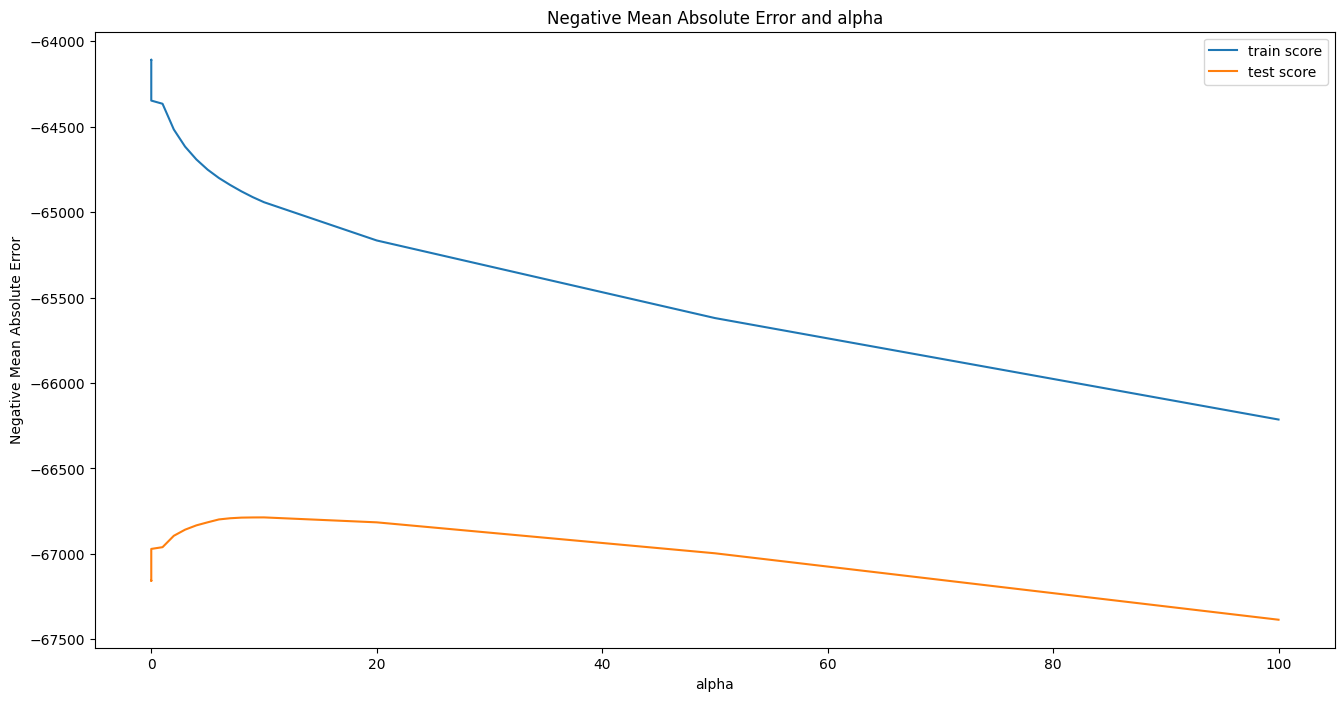

In [162]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

#cv_results = cv_results[cv_results['param_model__alpha']<=200]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

# 4.  ElasticNet()

In [50]:
model = ElasticNet() 

In [51]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

ElasticNet()

Zbiór treningowy:
MAE: 1464.0833277616541
MAPE: 0.11829181870871817
MSE: 4368313.692817912
Coefficient of determination r2: 0.44
Zbiór walidacyjny:
MAE: 1419.2899354079318
MAPE: 0.11522636028437679
MSE: 4105581.316282693
Coefficient of determination r2: 0.43

Krosswalidacja:

Wynik krosswalidacji: 
[-3549447.34689224 -4239217.87525136 -4795533.07815369 -4529007.38504616
 -4774002.58946056 -4539261.1493394  -3881593.13925795 -5103864.61920164
 -4033559.14826975 -4557171.60488035]
Średnia: -4400265.793575308



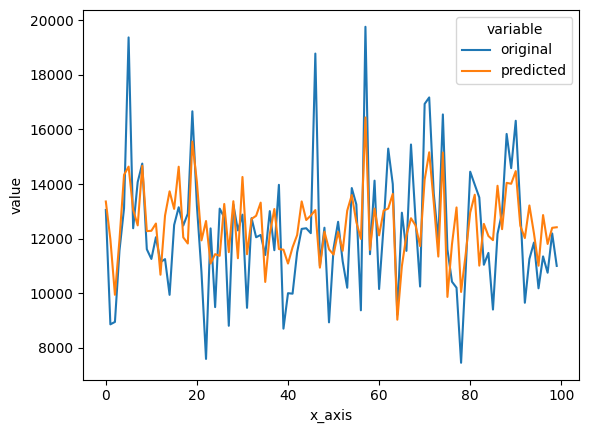

----------------------------



In [52]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot= True)

In [53]:
parameters_grid = {'model__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

In [54]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)
grid_cv_model

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6756941442.025483, tolerance: 3399157.77809857
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6377193277.803372, tolerance: 3332702.699376554
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6554340279.682452, tolerance: 3314586.420194843
  model = cd_fast.sparse_enet_coordinate_descent(

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                                                                          'balcon_garden_terrace_dummy_Zapytaj',
                                                                          'balcon_garden_terrace_dummy_balkon',
                                                                          'balcon_garden_terrace_dummy_og...
                                                                          'type_of_development',
                                                                          'window',
                                                                          'lift',
                                                                          'home_furnishings',
                                                                          'additional_info',
                                                                          'bulding_material',
                                                                          'district'])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                          0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                          5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                          100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
print(grid_cv_model.best_score_)

-1322.4204557411654


In [57]:
print(grid_cv_model.best_params_)

{'model__alpha': 0.01}


In [182]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)

----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
      

In [183]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.722992,0.014683,0.009774,4.107121e-03,0.000001,{'model__alpha': 1e-06},-66688.226749,-70384.136025,-67025.813794,-65688.533845,...,-67161.516461,1679.192845,5,-64226.134478,-63524.248596,-64016.171416,-64415.967251,-64344.210640,-64105.346476,320.548915
1,1.698655,0.020501,0.007779,3.988744e-04,0.00001,{'model__alpha': 1e-05},-66683.024697,-70379.737661,-67019.646261,-65669.537165,...,-67152.333096,1682.750459,4,-64231.961790,-63530.880406,-64024.623559,-64426.095127,-64353.871997,-64113.486576,321.518963
2,1.591741,0.011647,0.007978,6.309022e-04,0.0001,{'model__alpha': 0.0001},-66633.103900,-70350.042083,-66983.258756,-65571.288848,...,-67090.648243,1704.924747,3,-64285.157889,-63589.628086,-64093.173787,-64512.726068,-64433.208560,-64182.778878,329.216819
3,1.603709,0.015334,0.008577,7.978561e-04,0.001,{'model__alpha': 0.001},-66434.741391,-70249.861316,-66749.844577,-65388.662666,...,-66885.870431,1755.991720,2,-64607.660315,-63875.893681,-64450.021688,-64904.435365,-64821.803274,-64531.962864,364.860099
4,0.729642,0.006333,0.006981,2.431402e-07,0.01,{'model__alpha': 0.01},-65961.352841,-70314.258716,-66691.013964,-65640.400344,...,-66821.269927,1794.401811,1,-65318.266022,-64494.659637,-65156.611919,-65500.792507,-65479.969301,-65190.059877,369.253115


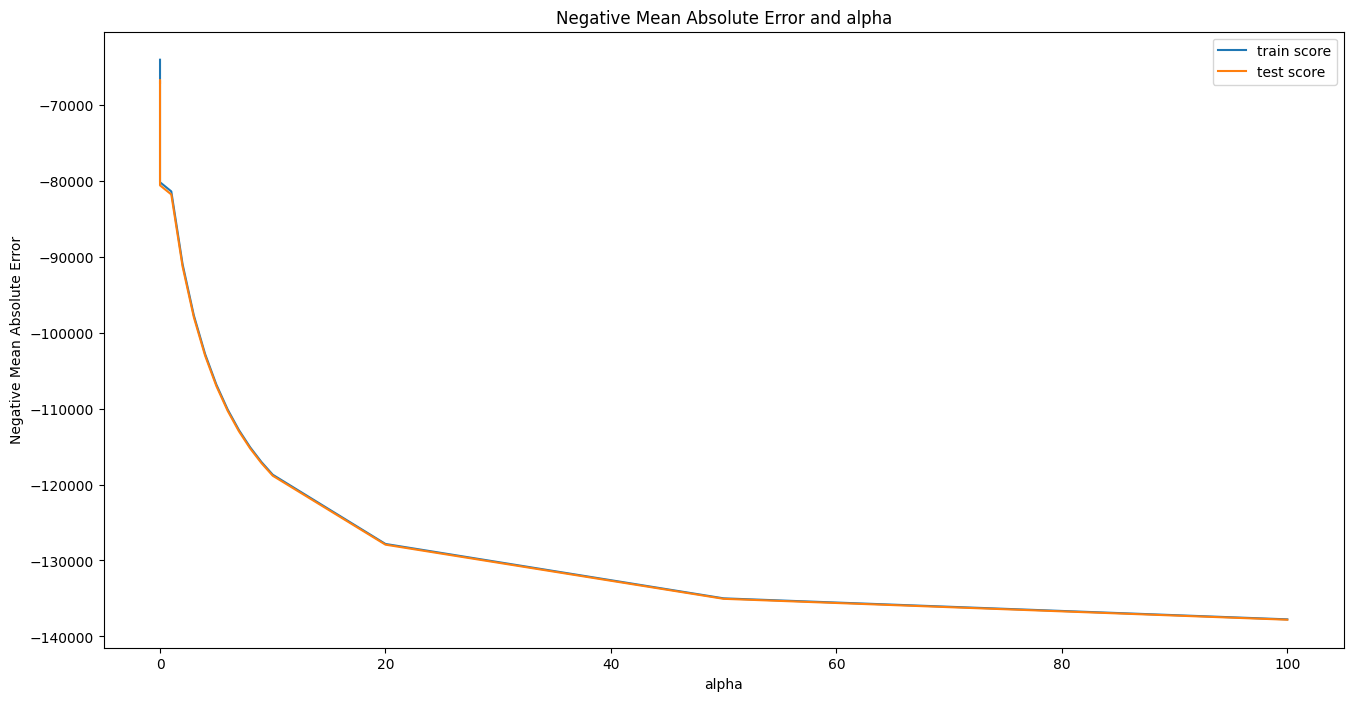

In [184]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

cv_results = cv_results[cv_results['param_model__alpha']<=200]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

# 5. DecisionTreeRegressor()

In [38]:
model = DecisionTreeRegressor()

In [39]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

DecisionTreeRegressor()

Zbiór treningowy:
MAE: 155.44415436651371
Coefficient of determination r2: 1.00
Zbiór walidacyjny:
MAE: 64707.899416898705
Coefficient of determination r2: 0.64

Krosswalidacja:

Wynik krosswalidacji: 
[0.69996902 0.6796253  0.55587958 0.59837038 0.59115588 0.56096635
 0.60951729 0.62903886 0.59878447 0.55127985]
Średnia: 0.6074586986571935



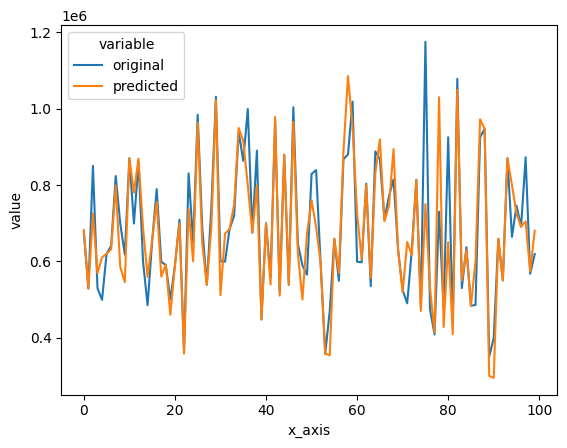

----------------------------



In [40]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot= True)

In [216]:
parameters_grid ={"model__splitter":["best","random"],
                  "model__max_depth" : [3,4,5,6], #"model__max_depth" : [1,3,5,7,9,11,12],
                  "model__min_samples_leaf":[1,2,3,4,5,6,10],#"model__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                  "model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],#"model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  "model__max_features":["auto","log2","sqrt",None],
                  "model__max_leaf_nodes":[None,10,20] } #"model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [217]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 2688 candidates, totalling 13440 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

In [218]:
grid_cv_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                                                                          'balcon_garden_terrace_dummy_Zapytaj',
                                                                          'balcon_garden_terrace_dummy_balkon',
                                                                          'balcon_gard...
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6],
                         'model__max_features': ['auto', 'log2', 'sqrt', None],
                         'model__max_leaf_nodes': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 10],
                         'model__min_weight_fraction_leaf': [0.1, 0.2, 0.3,
                                                             0.4],
                         'model__splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [219]:
print(grid_cv_model.best_score_)

-87875.65988502235


In [220]:
print(grid_cv_model.best_params_)

{'model__max_depth': 4, 'model__max_features': 'auto', 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 1, 'model__min_weight_fraction_leaf': 0.1, 'model__splitter': 'best'}


In [221]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)

----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
      

In [222]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
# cv_results head
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__max_leaf_nodes,param_model__min_samples_leaf,param_model__min_weight_fraction_leaf,param_model__splitter,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042088,0.005493,0.008771,0.001323,3,auto,None,1,0.1,best,...,-88759.875069,1881.444762,127,-87504.857954,-87305.487329,-89409.199910,-88059.819818,-88110.035190,-88077.880040,734.672381
1,0.034913,0.002612,0.008776,0.001466,3,auto,None,1,0.1,random,...,-112823.545267,8971.286695,857,-115953.452900,-102908.675481,-107443.805593,-123211.057496,-105527.777147,-111008.953724,7506.097442
2,0.038098,0.006383,0.008577,0.001197,3,auto,None,1,0.2,best,...,-93184.450274,2104.548242,169,-91627.384188,-92331.799977,-93861.860724,-92319.819209,-92212.439514,-92470.660722,742.329633
3,0.035511,0.002576,0.008976,0.001670,3,auto,None,1,0.2,random,...,-109331.293887,9279.147268,838,-125127.608435,-115289.650276,-104032.044613,-108269.317694,-95772.626105,-109698.249425,9973.962007
4,0.031709,0.002137,0.008577,0.001197,3,auto,None,1,0.3,best,...,-107503.632048,1431.887056,488,-105901.325575,-106096.140716,-106910.054356,-106076.140466,-105414.086120,-106079.549447,482.624178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0.038896,0.003624,0.009980,0.001992,6,None,20,10,0.2,random,...,-122472.403327,13183.166670,998,-107963.680977,-137663.484737,-136484.350308,-112406.736112,-113309.797575,-121565.609942,12796.611007
2684,0.036708,0.005858,0.007973,0.000631,6,None,20,10,0.3,best,...,-107503.632048,1431.887056,488,-105901.325575,-106096.140716,-106910.054356,-106076.140466,-105414.086120,-106079.549447,482.624178
2685,0.037505,0.004712,0.009784,0.002319,6,None,20,10,0.3,random,...,-119029.366368,15271.171072,927,-108122.279542,-106670.331360,-138533.423362,-107263.958307,-138904.892612,-119898.977037,15373.996132
2686,0.035305,0.004617,0.008184,0.000977,6,None,20,10,0.4,best,...,-107503.632048,1431.887056,488,-105901.325575,-106096.140716,-106910.054356,-106076.140466,-105414.086120,-106079.549447,482.624178


In [205]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

cv_results = cv_results[cv_results['param_model__alpha']<=200]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

KeyError: 'param_model__alpha'

In [ ]:
print(search.best_score_)

print(search.best_params_)

score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)

cv_results = pd.DataFrame(grid_cv_model.cv_results_)
# cv_results head
cv_results.head()

# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

cv_results = cv_results[cv_results['param_model__alpha']<=200]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

# 6. RandomForestRegressor()

In [41]:
model = RandomForestRegressor(n_estimators=50, random_state=0)

In [42]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

In [43]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid)

----------------------------

RandomForestRegressor(n_estimators=50, random_state=0)

Zbiór treningowy:
MAE: 18973.4293539976
Coefficient of determination r2: 0.97
Zbiór walidacyjny:
MAE: 47095.4262796977
Coefficient of determination r2: 0.83

Krosswalidacja:

Wynik krosswalidacji: 
[0.8340651  0.80589608 0.77390463 0.78302564 0.78937168 0.78409892
 0.81988965 0.8318235  0.80315531 0.79888021]
Średnia: 0.8024110730851056

----------------------------



In [232]:
parameters_grid ={"model__bootstrap":[True],
                  "model__n_jobs" : [-1],
                  "model__max_depth" : [2, 4, 6], #"model__max_depth" : [1,3,5,7,9,11,12],
                  "model__n_estimators" : [10,50,100],
                  "model__min_samples_split":[1, 2, 3],#"model__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                  "model__min_weight_fraction_leaf":[0.0, 0.3],#"model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  "model__max_features":[1, "sqrt"],
                  "model__min_samples_leaf":[1, 2, 4] } #"model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [233]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Li

In [234]:
grid_cv_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                                                                          'balcon_garden_terrace_dummy_Zapytaj',
                                                                          'balcon_garden_terrace_dummy_balkon',
                                                                          'balcon_gard...
                                                              random_state=0))]),
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [2, 4, 6],
                         'model__max_features': [1, 'sqrt'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [1, 2, 3],
                         'model__min_weight_fraction_leaf': [0.0, 0.3],
                         'model__n_estimators': [10, 50, 100],
                         'model__n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [235]:
print(grid_cv_model.best_score_)

-95519.24701401463


In [236]:
print(grid_cv_model.best_params_)

{'model__bootstrap': True, 'model__max_depth': 6, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 3, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 10, 'model__n_jobs': -1}


In [237]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)

----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
      

# Zastanowić się nad parametrami random forest regresor tak żeby był mniej przetrenowany

In [238]:
# Następnie przejść do XGBRegressor() 

# 6. XGBRegressor()

In [83]:
model = XGBRegressor()

In [84]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Zbiór treningowy:
MAE: 480.0387856668757
MAPE: 0.03971923068878697
MSE: 453757.8131965337
Coefficient of determination r2: 0.94
Zbiór walidacyjny:
MAE: 915.3256440627342
MAPE: 0.07390789962840794
MSE: 1885550.9846027119
Co

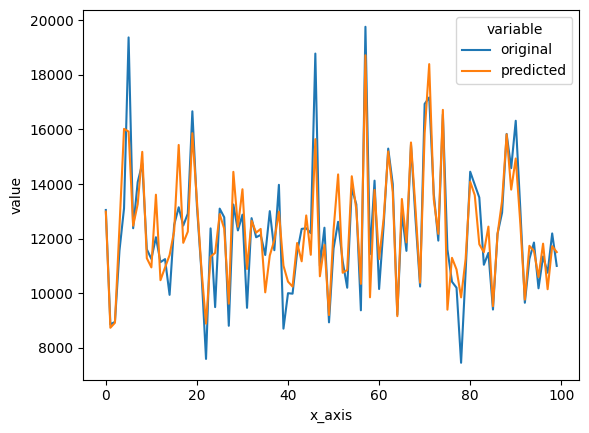

----------------------------



In [85]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot=True)

In [86]:
parameters_grid ={"model__learning_rate":[ .06, .07, .08, .09],
                  "model__n_jobs" : [-1],
                  "model__max_depth" : [ 7, 8, 9, 10, 15, 20], #"model__max_depth" : [1,3,5,7,9,11,12],
                  "model__min_child_weight" : [.001, .005, .01, .015, .1, 1],
                  "model__max_leaves" : [0, 1, 10, 100, 200, 1000, 10000 ],
                  "model__min_split_loss" : [None, 10, 100, 500, 1000, 1500, 2000, 10000],
                  "model__sampling_method" : ["uniform", "gradient_based"],
                  "model__booster" : ["gbtree", "gblinear"],
                  #"model__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                  "model__subsample":[.01, .1, .5, .7, .75, 0.8, .85, 1],#"model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  "model__colsample_bytree":[ .7, .75, .8, .85,  1],
                  "model__n_estimators":[500, 550, 600, 650, 700, 800] } #"model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [87]:
rs_model=RandomizedSearchCV(pipeline, param_distributions=parameters_grid, n_iter=1000, n_jobs=-1, cv=3, verbose=1)

In [88]:
rs_model.fit(X_train,y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
801 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer_num',
                                                                                                SimpleImputer()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['area',
                                                                                'numbers_of_rooms',
                                                                                'amount_of_rent',
                                                                                'number_of_floors',
                                                                                'balcon_garden_terrace_dummy_Zapytaj',
                                                                                'balcon_garden_terrace_dummy_balkon',
                                                                                'balcon_garden_terrace_du...
                                        'model__max_leaves': [0, 1, 10, 100,
                                                              200, 1000,
                                                              10000],
                                        'model__min_child_weight': [0.001,
                                                                    0.005, 0.01,
                                                                    0.015, 0.1,
                                                                    1],
                                        'model__min_split_loss': [None, 10, 100,
                                                                  500, 1000,
                                                                  1500, 2000,
                                                                  10000],
                                        'model__n_estimators': [500, 550, 600,
                                                                650, 700, 800],
                                        'model__n_jobs': [-1],
                                        'model__sampling_method': ['uniform',
                                                                   'gradient_based'],
                                        'model__subsample': [0.01, 0.1, 0.5,
                                                             0.7, 0.75, 0.8,
                                                             0.85, 1]},
                   verbose=1)

In [50]:
print(rs_model.best_score_)

0.8164792523730194


In [51]:
print(rs_model.best_params_)

{'model__subsample': 0.85, 'model__sampling_method': 'uniform', 'model__n_jobs': -1, 'model__n_estimators': 550, 'model__min_split_loss': 2000, 'model__min_child_weight': 0.001, 'model__max_leaves': 1000, 'model__max_depth': 8, 'model__learning_rate': 0.06, 'model__colsample_bytree': 0.7, 'model__booster': 'gbtree'}


In [52]:
rs_model

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer_num',
                                                                                                SimpleImputer(strategy='constant')),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['area',
                                                                                'numbers_of_rooms',
                                                                                'amount_of_rent',
                                                                                'number_of_floors',
                                                                                'balcon_garden_terrace_dummy_Zapytaj',
                                                                                'balcon_garden_terrace_dummy_balkon',
                                                                                'balco...
                                        'model__max_leaves': [0, 1, 10, 100,
                                                              200, 1000,
                                                              10000],
                                        'model__min_child_weight': [0.001,
                                                                    0.005, 0.01,
                                                                    0.015, 0.1,
                                                                    1],
                                        'model__min_split_loss': [None, 10, 100,
                                                                  500, 1000,
                                                                  1500, 2000,
                                                                  10000],
                                        'model__n_estimators': [500, 550, 600,
                                                                650, 700, 800],
                                        'model__n_jobs': [-1],
                                        'model__sampling_method': ['uniform',
                                                                   'gradient_based'],
                                        'model__subsample': [0.01, 0.1, 0.5,
                                                             0.7, 0.75, 0.8,
                                                             0.85, 1]},
                   verbose=1)

----------------------------

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer_num',
                                                                                                SimpleImputer()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['area',
                                                                                'numbers_of_rooms',
                                                                                'amount_of_rent',
                                                           

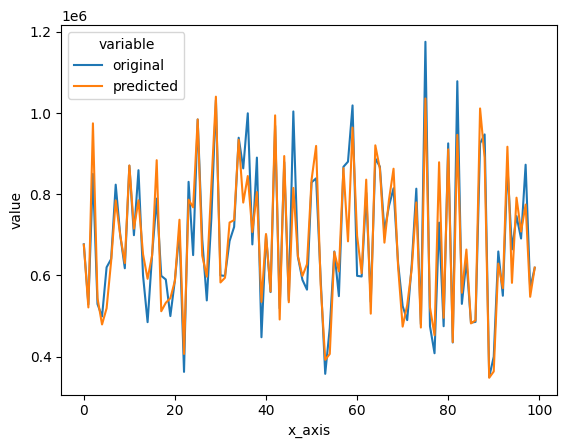

----------------------------



In [52]:
score_model(rs_model, pipeline, X_train, y_train, X_valid, y_valid, plot = True)

# 7. wykorzystanie sieci neuronowych do regresji

Wrócić w późniejszym czasie do tego i spróbować wykorzystać sieci neuronowe do regresji 